None


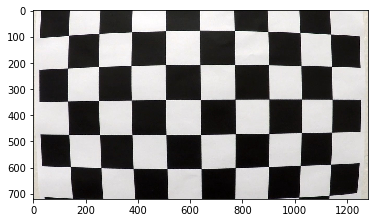

In [1]:
#import numpy as np
#import cv2
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg



# prepare object points
nx = 9 # enter the number of inside corners in x
ny = 6 # enter the number of inside corners in y
#import PyQt4
import matplotlib
#print(matplotlib.get_backend())
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import PyQt4
%matplotlib inline
import glob
import os; 

import random
print(os.environ.get('QT_API'))
img = mpimg.imread('camera_cal/calibration1.jpg')
plt.imshow(img)

objpoints   = []; # 3D points in real world spaces Real chessboard points in 2d plane for 8x6 or whateva size u like. its always same
imgpoints = []; # 2D points in image plane

objp= np.zeros((ny*nx,3),np.float32)
objp[:,:2]=np.mgrid[0:nx,0:ny].T.reshape(-1,2) # x,y coordinates

images=glob.glob('camera_cal/calibration*.jpg')


camera_cal/calibration10.jpg
seraching corner
corners found
camera_cal/calibration6.jpg
seraching corner
corners found
camera_cal/calibration9.jpg
seraching corner
corners found
camera_cal/calibration7.jpg
seraching corner
corners found
camera_cal/calibration19.jpg
seraching corner
corners found
camera_cal/calibration20.jpg
seraching corner
corners found
camera_cal/calibration16.jpg
seraching corner
corners found
camera_cal/calibration1.jpg
seraching corner
camera_cal/calibration17.jpg
seraching corner
corners found
camera_cal/calibration2.jpg
seraching corner
corners found
camera_cal/calibration8.jpg
seraching corner
corners found
camera_cal/calibration4.jpg
seraching corner
camera_cal/calibration15.jpg
seraching corner
corners found
camera_cal/calibration3.jpg
seraching corner
corners found
camera_cal/calibration14.jpg
seraching corner
corners found
camera_cal/calibration11.jpg
seraching corner
corners found
camera_cal/calibration13.jpg
seraching corner
corners found
camera_cal/calib

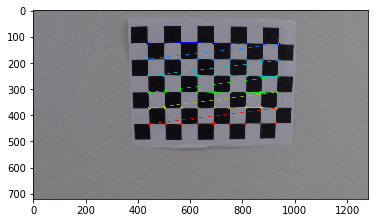

In [2]:
# Gather Calibration values

objp= np.zeros((ny*nx,3),np.float32)
objp[:,:2]=np.mgrid[0:nx,0:ny].T.reshape(-1,2) # x,y coordinates
images=glob.glob('camera_cal/calibration*.jpg')
undists=[]
imags=[]
idx=1
#objpoints=np.array(dtype=float32)
#imgpoints=[]
#print(images)

for fname in images:
    # read in each image
    img=mpimg.imread(fname)
    print(fname)
    # convert image to grayscale
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # FIND THE CHESSBOARD CORNERS
    ret, corners = cv2.findChessboardCorners(gray,(nx,ny),None)
    print('seraching corner')
    # If corners are found, add object points ,image points
    if ret ==True:
        print('corners found')
        imgpoints.append(corners)
        objpoints.append(objp)
        
        # draw and display the corners
        img = cv2.drawChessboardCorners(img,(nx,ny),corners,ret)
        plt.imshow(img)

In [3]:
# Undistort Images

def cal_undistort(img, objpoints, imgpoints, cal):
    # Use cv2.calibrateCamera() and cv2.undistort()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,corners=cv2.findChessboardCorners(gray,(nx,ny),None)
    if ret==True:
        imgpoints.append(corners)
        objpoints.append(objp)
        img=cv2.drawChessboardCorners(img,(nx,ny),corners,ret)
        plt.imshow(img)
    if cal==True:
        ret,mtx,dist,rvecs,tvecs=cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)
        undist=cv2.undistort(img,mtx,dist,None,mtx)
    else:
        undist = np.copy(img)  # Delete this line
    return undist

undists=[]
imags=[]
mtx_arr=[]
dist_arr=[]
for fname in images:
    img=mpimg.imread(fname)
    imags.append(img)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #ret,mtx,dist,rvecs,tvecs=cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    mtx_arr.append(mtx)
    dist_arr.append(dist)
    undist=cv2.undistort(img,mtx,dist,None,mtx)
    print(fname)
    undists.append(undist)
    

camera_cal/calibration10.jpg
camera_cal/calibration6.jpg
camera_cal/calibration9.jpg
camera_cal/calibration7.jpg
camera_cal/calibration19.jpg
camera_cal/calibration20.jpg
camera_cal/calibration16.jpg
camera_cal/calibration1.jpg
camera_cal/calibration17.jpg
camera_cal/calibration2.jpg
camera_cal/calibration8.jpg
camera_cal/calibration4.jpg
camera_cal/calibration15.jpg
camera_cal/calibration3.jpg
camera_cal/calibration14.jpg
camera_cal/calibration11.jpg
camera_cal/calibration13.jpg
camera_cal/calibration12.jpg
camera_cal/calibration5.jpg
camera_cal/calibration18.jpg


In [4]:
def pipeline(img, s_thresh=(170, 255), sx_thresh=(15, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    return color_binary

In [5]:
# perspective transform of road
import matplotlib.patches as patches
#topL=[623.469,425.699]
#topR=[660.199,425.699]
topL=[602.145, 443.433]
topR=[681.948, 443.433]
bottomL=[247.022, 691.62]
bottomR=[1076.97, 691.62]
%matplotlib inline

def persp_trans(undist):
    src = np.float32([topL, topR, bottomR, bottomL])
    offset = 200
    img_size = (undist.shape[1], undist.shape[0])
    #dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
    #[img_size[0]-offset, img_size[1]-offset], 
    #[offset, img_size[1]-offset]])
    
    dst1=np.float32([[250,0],[950,0],[950,700],[250,700]])
    #print(dst1)
    M = cv2.getPerspectiveTransform(src, dst1)
    warped = cv2.warpPerspective(undist, M, img_size)
    return warped



In [6]:
def undistort_img(image):
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist=cv2.undistort(image,mtx,dist,None,mtx)
    return undist

def undistort_img1(image,mtx,dist):
    undist=cv2.undistort(image,mtx,dist,None,mtx)
    return undist

In [7]:
def img_process(image, thresh_min, thresh_max):
    undist=undistort_img1(image,mtx,dist)
    wrpimg=persp_trans(undist)
    
    color_bin=pipeline(wrpimg, s_thresh=(130, 255), sx_thresh=(10, 100))
    #plt.imshow(color_bin)
    hls = cv2.cvtColor(wrpimg, cv2.COLOR_RGB2HLS)
    #hls=pimage
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    thresh = (thresh_min, thresh_max)
    #print(np.min(S))
    R = wrpimg[:,:,0]
    G = wrpimg[:,:,1]
    B = wrpimg[:,:,2]
    
    
    binary = np.zeros_like(S)
    binary[(((S > thresh[0]) & (S <= thresh[1])) | (color_bin[:,:,2]==1 ) |  (color_bin[:,:,1] ==1)) & ((L > 5 )  & (R > 30) & (G >10))] = 1
    
    #col_s=color_bin[:,:,2]
    #color_bina=np.zeros_like(col_s)
    #color_bina[(color_bin[:,:,2]==1 )| (color_bin[:,:,1] ==1)] =1
    #plt.imshow(color_bina*255)
    #print(np.min(color_bina))
    return binary

tst_images=glob.glob('test_images/test*.jpg')
rand_idx=3
#rand_idx=random.randint(0,5)  
print(tst_images[rand_idx])
image=mpimg.imread(tst_images[rand_idx])
thresh_min=120
thresh_max=255
bina=img_process(image,thresh_min,thresh_max)

test_images/test2.jpg


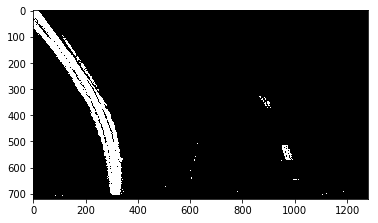

In [8]:

plt.imshow(bina, cmap='gray')

In [9]:
from collections import deque
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = deque(maxlen=10)
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        #x values in windows
        self.windows = np.ones((3,12))*-1
        
print("line class is defined")

line class is defined


In [10]:
from collections import deque

data=deque(maxlen=5)
data1=deque(maxlen=5)
if not data or not  data1:
    print('empty')
    
    
for i in range(1,10):
    data.append([i ,i+1,i+2])

print(data)
print(data[1])
datac=np.mean(data,0)

print(np.mean(data,0))
if np.all(datac)<np.all(data[4]):
    print('hi5')
print(data[-1])

empty
deque([[5, 6, 7], [6, 7, 8], [7, 8, 9], [8, 9, 10], [9, 10, 11]], maxlen=5)
[6, 7, 8]
[ 7.  8.  9.]
[9, 10, 11]


In [11]:
a=[5,5,5]
b=[4,4,4]

In [59]:

#plt.imshow(binary,cmap='gray')

NUM_FRAME=0  # global
left_fit_mat=None
right_fit_mat=None
def lane_map(image): 
    global NUM_FRAME
    global binary_warped
    #global left_fit_mat
    #global right_fit_mat
    thresh_min=120
    thresh_max=255
    if NUM_FRAME<1 or NUM_FRAME%3==0:
        binary=img_process(image,thresh_min,thresh_max)
        binary_warped=binary
        # Assuming you have created a warped binary image called "binary_warped"
        # Take a histogram of the bottom half of the image
        histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
        # Create an output image to draw on and  visualize the result
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines
        midpoint = np.int(histogram.shape[0]/2)
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint

        # Choose the number of sliding windows
        nwindows = 9
        # Set height of windows
        window_height = np.int(binary_warped.shape[0]/nwindows)
        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Current positions to be updated for each window
        leftx_current = leftx_base
        rightx_current = rightx_base
        # Set the width of the windows +/- margin
        margin = 100
        # Set minimum number of pixels found to recenter window
        minpix = 50
        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []

        # Step through the windows one by one
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height
            
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin
            
            # Draw the windows on the visualization image
            cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
            cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
            
            # Identify the nonzero pixels in x and y within the window
            good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
            
            # Append these indices to the lists
            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)
            
            # If you found > minpix pixels, recenter next window on their mean position
            if len(good_left_inds) > minpix:
                leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            if len(good_right_inds) > minpix:        
                rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # Concatenate the arrays of indices
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
        
        
        
    elif NUM_FRAME>=1:
        # After first frame
        #tst_images=glob.glob('test_images/test*.jpg')
        #rand_idx=random.randint(0,5)  
        #print(tst_images[rand_idx])
        #image=mpimg.imread(tst_images[rand_idx])
        #plot=True
        binary=img_process(image,thresh_min,thresh_max)

        img=binary
        histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
        # Assume you now have a new warped binary image 
        # from the next frame of video (also called "binary_warped")
        # It's now much easier to find line pixels!
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        margin = 100
        left_fit=left_lane.current_fit
        right_fit=right_lane.current_fit
        #print(left_fit)
        #left_fit=left_fit_mat[NUM_FRAME]
        #right_fit=right_fit_mat[NUM_FRAME]
        left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
        right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    #print(left_fit[2])
    
    if not left_lane.recent_xfitted or not right_lane.recent_xfitted:
        left_lane.recent_xfitted.append(left_fit)
        right_lane.recent_xfitted.append(right_fit)
    else:
        mean_val_left=np.mean(left_lane.recent_xfitted,0)
        #print(mean_val_left)
        mean_val_right=np.mean(right_lane.recent_xfitted,0)
        col_left = left_lane.recent_xfitted
        col_right = right_lane.recent_xfitted
        
        prev_left = left_lane.recent_xfitted[-1]
        prev_right = right_lane.recent_xfitted[-1]
        
        left_lane.recent_xfitted.append(left_fit)
        right_lane.recent_xfitted.append(right_fit)
        
        left_fit = np.mean(left_lane.recent_xfitted,0)
        right_fit = np.mean(right_lane.recent_xfitted,0)
  
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)

    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    # Store the left fit and right fit parameter to class
    left_lane.current_fit=left_fit
    right_lane.current_fit=right_fit
    
    # Increment the frame count
    NUM_FRAME=NUM_FRAME+1
    
    src = np.float32([topL, topR, bottomR, bottomL])
    dst1=np.float32([[250,0],[950,0],[950,700],[250,700]])
    Minv = cv2.getPerspectiveTransform(dst1, src)
    
    
    #Crveate an image to draw the lines on
    warp_zero = np.zeros_like(binary).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undistort_img1(image,mtx,dist), 1, newwarp, 0.3, 0)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    ## Add radius of curvature to video
    text = "Radius of Curvature: {} m".format(int(left_curverad))
    cv2.putText(result,text,(400,100), font,1,(255,255,255),2)
    
    
    ## Position of the car wrt to center
    pts = np.argwhere(newwarp[:,:,1])
    position=result.shape[1]/2
    left=np.min(pts[(pts[:,1] < position) & (pts[:,0] > 700)][:,1])
    right = np.max(pts[(pts[:,1] > position) & (pts[:,0] > 700)][:,1])
    center = (left + right)/2
    
    #print(position,left,right,center)
    car_pos=(position - center)*xm_per_pix
    #print(car_pos)
    if car_pos <0:
        text = "Position of Vehicle from center to left: {:.2f}m".format(-car_pos)
    else:
        text = "Position of Vehicle from center to right: {:.2f}m".format(car_pos)
    cv2.putText(result,text,(400,150),font,1,(255,255,255),2)
    
    
    return result

In [60]:
left_lane=Line()
right_lane=Line()

In [61]:
#NUM_FRAME=0
tst_images=glob.glob('test_images/test*.jpg')
rand_idx=random.randint(0,5)  
#rand_idx=3
print(tst_images[rand_idx])
image=mpimg.imread(tst_images[rand_idx])
retu=lane_map(image)

test_images/test1.jpg


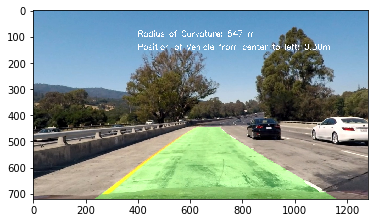

In [62]:
plt.imshow(retu)

In [63]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [64]:
NUM_FRAME=0
left_lane=Line()
right_lane=Line()
lane_map_output = 'project_video_soln.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(lane_map) #NOTE: this function expects color images!!
%time white_clip.write_videofile(lane_map_output, audio=False)

[MoviePy] >>>> Building video project_video_soln.mp4
[MoviePy] Writing video project_video_soln.mp4



100%|█████████▉| 1260/1261 [04:05<00:00,  5.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_soln.mp4 

CPU times: user 7min 17s, sys: 28.9 s, total: 7min 46s
Wall time: 4min 6s


In [65]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(lane_map_output))